# Time Series Clustering Analysis (with approximation)

In [52]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import matplotlib.pyplot as plt
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [53]:
df = pd.read_csv(r"C:\Users\sirio\Downloads\new_ts.csv")

In [54]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['genre_top'], inplace=True)

In [55]:
df

,0,1,2,3,4,5,6,7,8,9,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291
0,0.110271,0.142744,0.156790,0.131847,0.125279,0.129176,0.128395,0.171358,0.298087,0.304533,...,0.296138,0.217364,0.184314,0.176318,0.161866,0.158079,0.158619,0.148111,0.146005,0.000000
1,0.006719,0.054514,0.079609,0.077952,0.072813,0.072603,0.072872,0.098724,0.118636,0.106666,...,0.095272,0.129105,0.142501,0.124919,0.130170,0.138979,0.116884,0.099691,0.095573,0.000000
2,0.087681,0.122366,0.150302,0.189881,0.211978,0.170829,0.149644,0.176552,0.178881,0.147802,...,0.125453,0.183139,0.161663,0.074765,0.044639,0.034170,0.034739,0.035171,0.063755,0.076289
3,0.119357,0.106159,0.080638,0.064474,0.052454,0.040984,0.039673,0.049779,0.069978,0.263497,...,0.242289,0.171337,0.113355,0.300802,0.439506,0.431388,0.391572,0.363932,0.309056,0.000000
4,0.115339,0.137193,0.168915,0.182634,0.153418,0.102983,0.102048,0.110600,0.176242,0.216883,...,0.205241,0.208874,0.206448,0.168052,0.172136,0.202518,0.160088,0.120959,0.129631,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,0.163694,0.173925,0.167539,0.155813,0.173454,0.170237,0.153887,0.169713,0.164870,0.155703,...,0.040768,0.038514,0.034576,0.034574,0.031457,0.034171,0.065264,0.083422,0.086217,0.000000
5873,0.393062,0.495628,0.546166,0.450871,0.310079,0.221216,0.223185,0.207090,0.213689,0.214490,...,0.113636,0.105030,0.103685,0.114042,0.126202,0.123501,0.121250,0.123640,0.116748,0.100580
5874,0.399407,0.390362,0.382917,0.388529,0.387102,0.381566,0.380393,0.372491,0.372524,0.385664,...,0.085319,0.081522,0.086226,0.086557,0.092305,0.088989,0.095928,0.109711,0.104461,0.000000
5875,0.272532,0.269482,0.275583,0.281399,0.265883,0.254405,0.255271,0.249953,0.246832,0.251524,...,0.242491,0.251883,0.254824,0.248062,0.270650,0.277818,0.261602,0.252174,0.246955,0.000000


In [56]:
df_t = df.transpose()

### La time series viene normalizzata

In [57]:
scaler = TimeSeriesScalerMeanVariance(mu = 0., std = 1.)

In [58]:
df_t = scaler.fit_transform(df_t)

### la time serie viene approssimata utilizzando One Dimension SAX

In [59]:
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=35,
    alphabet_size_avg=20,
    alphabet_size_slope=10)

In [60]:
df_t = np.squeeze(df_t)

In [61]:
df_app_dsax_ts = one_d_sax.inverse_transform(one_d_sax.fit_transform(df_t.T))

C:\Users\sirio\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 5877 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [62]:
df_app_dsax_ts = np.squeeze(df_app_dsax_ts)

In [63]:
df_app_dsax_ts.shape

(5877, 1292)

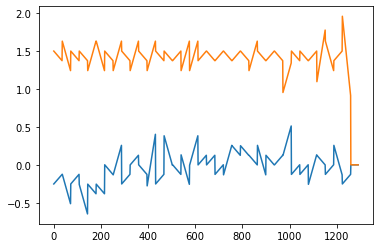

In [64]:
plt.plot(df_app_dsax_ts[0].ravel())
plt.plot(df_app_dsax_ts[10].ravel())
plt.show()

In [65]:
df_norm = pd.DataFrame(data = df_app_dsax_ts)

In [15]:
df_norm.shape

(5877, 1292)

### viene eseguito il clustering utilizzando il dynamic time warping come metrica per la distanza

In [16]:
km = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=6, random_state=0)

In [17]:
km.fit(df_norm)

TimeSeriesKMeans(max_iter=6, metric='dtw', n_clusters=6, random_state=0)

In [18]:
km.labels_

array([0, 2, 3, ..., 1, 5, 3], dtype=int64)

In [19]:
unique, counts = np.unique(km.labels_, return_counts=True)

In [20]:
#controllo numero di cluster e numerosità di ogni cluster
unique, counts

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([1313,  390,  669, 1463,  825, 1217], dtype=int64))

In [44]:
km.cluster_centers_.shape

(6, 1292, 1)

In [45]:
np.squeeze(km.cluster_centers_).shape

(6, 1292)

### vengono visualizzati i centri dei clusters

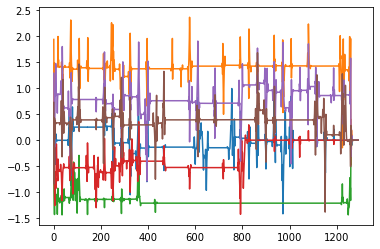

In [46]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [69]:
df_norm['labels'] = km.labels_

In [70]:
df = pd.read_csv(r"C:\Users\sirio\Downloads\new_ts.csv")

### viene fatta l'analisi dei clusters

In [71]:
df_norm['genre'] = df['genre_top']

In [72]:
cross = pd.crosstab(df_norm['labels'], df_norm['genre'], normalize='index')

In [73]:
cross

genre,Hip-Hop,Pop
labels,,
0,0.659558,0.340442
1,0.733333,0.266667
2,0.340807,0.659193
3,0.494190,0.505810
4,0.785455,0.214545
5,0.653246,0.346754


<AxesSubplot:xlabel='labels'>

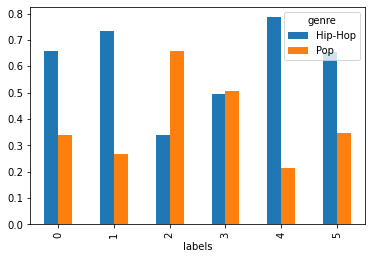

In [74]:
cross.plot(kind='bar')

In [75]:
tab = pd.crosstab(df_norm['labels'], df_norm['genre'], normalize='columns')

<AxesSubplot:xlabel='labels'>

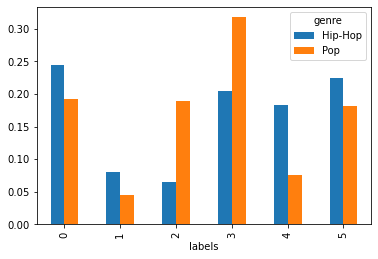

In [76]:
tab.plot(kind='bar')